## Machine Learning ##
_____________________________________________________________________________________________
**Health Insurance Marketplace:** In this part I will try to predict Individual Rates and Individual Tobacco Rates using regression models and will comapare results and performance of these models.

### Predict the monthly premium of individuals and individual tobacco users. ###
**How premiums are set**<br>
Under the health care law, insurance companies can account for only 5 things when setting premiums.

**1.Age:** Premiums can be up to 3 times higher for older people than for younger ones.

**2.Location:** Where you live has a big effect on your premiums. Differences in competition, state and local rules, and cost of living account for this.

**3.Tobacco use:** Insurers can charge tobacco users up to 50% more than those who don’t use tobacco.

**4.Individual vs. family enrollment:** Insurers can charge more for a plan that also covers a spouse and/or dependents.

**5.Plan category:** There are five plan categories – Bronze, Silver, Gold, Platinum, and Catastrophic. The categories are based on how you and the plan share costs. Bronze plans usually have lower monthly premiums and higher out-of-pocket costs when you get care. Platinum plans usually have the highest premiums and lowest out-of-pocket costs.

For more details on this please refer to the link below.<br>
https://www.healthcare.gov/how-plans-set-your-premiums/

In [4]:
# This cell will be used for import. All the necessary packages and libraries will be imported.
# As the work on this project moves on, the required packages will be imported.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import Figure
py.sign_in('username', 'password')
from ggplot import *
%matplotlib inline 


### Rate data set ###
From the Explainatory Data Analysis(EDA) part of this project, we already have the required rate dataset in csv form. We just need to import the csv file.<br>
We have to do some cleaning in the dataframe to bring it in the format we need.

In [647]:
# import csv file into dpandas ataframe 
rates = pd.read_csv('merged_rates.csv')

In [648]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18081008 entries, 0 to 18081007
Data columns (total 22 columns):
Unnamed: 0                                   int64
Age                                          object
BusinessYear                                 int64
Couple                                       float64
CoupleAndOneDependent                        float64
CoupleAndThreeOrMoreDependents               float64
CoupleAndTwoDependents                       float64
FederalTIN                                   object
ImportDate                                   object
IndividualRate                               float64
IndividualTobaccoRate                        float64
IssuerId                                     int64
PlanId                                       object
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndThreeOrMoreDependents    float64
PrimarySubscriberAndTwoDependents            float64
RateEffectiveDate                            ob

In [649]:
rates.Age.unique()

array(['0-20', 'Family Option', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65 and over', '0-14', '15', '16', '17',
       '18', '19', '20', '64 and over'], dtype=object)

In [691]:
age_grp = ['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                  '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
                  '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
                  '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
                  '64', '65 and over']

In [692]:
# Get rid off the columns which appears after '65 and over' above.
rates = rates[rates.Age.isin(age_grp)]
rates.Age.unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over'], dtype=object)

In [693]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17676705 entries, 0 to 18081003
Data columns (total 22 columns):
Unnamed: 0                                   int64
Age                                          object
BusinessYear                                 int64
Couple                                       float64
CoupleAndOneDependent                        float64
CoupleAndThreeOrMoreDependents               float64
CoupleAndTwoDependents                       float64
FederalTIN                                   object
ImportDate                                   object
IndividualRate                               float64
IndividualTobaccoRate                        float64
IssuerId                                     int64
PlanId                                       object
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndThreeOrMoreDependents    float64
PrimarySubscriberAndTwoDependents            float64
RateEffectiveDate                            ob

In [695]:
# Create dataframe with the columns which will be required for this Regression Analysis: ml_rates
ml_rates = rates[['Age','BusinessYear','IndividualRate','IndividualTobaccoRate','PlanId',
                 'RatingAreaId','StateCode','Tobacco']]
ml_rates.head(2) # just to make sure we have all the required columns

,Age,BusinessYear,IndividualRate,IndividualTobaccoRate,PlanId,RatingAreaId,StateCode,Tobacco
0,0-20,2014,29.0,NaN,21989AK0010001,Rating Area 1,AK,No Preference
3,21,2014,32.0,NaN,21989AK0010001,Rating Area 1,AK,No Preference


we know from EDA part of this project that individual rate column has this sudo numbers eleminating those 9999 kind of numbers.

In [697]:
# Drop individual rates more than 9000.
ml_rates = ml_rates[ml_rates['IndividualRate'] < 9000]

In [698]:
# verification of whatever done above.
print("Max of Individual Rate:", ml_rates.IndividualRate.max())
print("Unique Ages:", ml_rates.Age.unique())

Max of Individual Rate: 5503.85
Unique Ages: ['0-20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33'
 '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '62' '63'
 '64' '65 and over']


In [668]:
# basic info about the dataframe.
ml_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17588591 entries, 0 to 18081003
Data columns (total 8 columns):
Age                      object
BusinessYear             int64
IndividualRate           float64
IndividualTobaccoRate    float64
PlanId                   object
RatingAreaId             object
StateCode                object
Tobacco                  object
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ GB


All look good with the rate dataframe. Will save this dataframe for intermediate work if needed. This would help repeat of work if for any reason the notebook has to restart. It also help if there is memory crunch on the system you are working on.

In [700]:
# save the dataframe to csv file on hard disk.
ml_rates.to_csv('ml_rates.csv')

### Plan attribute dataset ###
The second dataset required for this regression analysis is plan_attribute. From the Explainatory Data Analysis(EDA) part of this project, we already have the required plan attribute dataset in csv form. We just need to import the csv file.<br>
We may have to do some cleaning in the dataframe to bring it in the format we need.

In [701]:
# import plan_attribute csv file into dataframe: pa
pa = pd.read_csv('plan_attribute.csv', low_memory=False)
pa.head(2)

,Unnamed: 0,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyPerGroupMOOP,...,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,WellnessProgramOffered
0,0,NaN,0,0,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,NaN
1,1,NaN,0,0,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,NaN


In [702]:
# Basic information about the pa dataframe.
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112579 entries, 0 to 112578
Columns: 154 entries, Unnamed: 0 to WellnessProgramOffered
dtypes: float64(5), int64(6), object(143)
memory usage: 132.3+ MB


As we can see from the above that there are 154 columns in this dataframe. We need only two columns from this dataframe, PlanId and MetalLevel. Rest all the columns are not useful for this project.<br>
So I have all the datframes required, but need to merge these two dataframes(rates and plan_attribute) on PlanId column.

### Merge plan attribute(pa) and rates: plans_to_use ###
I will extract all the metal levels which are available in the healthcare insurance marketplce. As described in the EDA part of this project, Metal Level is one of the most crucial element of deciding monthly premiums.

In [703]:
# Metal level of all the plans: plans_to_use
plans_to_use = pa[['PlanId','MetalLevel']]

In [704]:
plans_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112579 entries, 0 to 112578
Data columns (total 2 columns):
PlanId        112579 non-null object
MetalLevel    112579 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


**PlanId** column of rates dataset has only 14 alpha-numeric characters and whereas the **PlanId** of the plan attribute dataset has 17 characters. First 14 characters will be same and last 3 characters specify cost sharing reduction(CSR).

In [705]:
plans_to_use.PlanId = plans_to_use.PlanId.str[:14]

/Users/vishalshilpi/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [706]:
# check that the PlanId column has 14 character values.
plans_to_use.PlanId.head(2)

0    21989AK0020002
1    21989AK0020002
Name: PlanId, dtype: object

In [707]:
plans_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112579 entries, 0 to 112578
Data columns (total 2 columns):
PlanId        112579 non-null object
MetalLevel    112579 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


In [708]:
# Groupby plans_to_use dataframe to have unique PlanId and MetalLevel
plans_to_use = plans_to_use.groupby(['PlanId','MetalLevel'])

In [709]:
# make groupby dataframe to dataframe using count()
plans_to_use = plans_to_use.count()
plans_to_use.reset_index(inplace=True)

In [710]:
# Save this dataframe into csv file on hard drive.
plans_to_use.to_csv('plan_to_use.csv')

In [711]:
# dataframe after merging plan attribute and rates dataframes: ml_plan_rates
ml_plan_rates = ml_rates.join(plans_to_use.set_index('PlanId'), on='PlanId', how= 'inner')

In [712]:
# statistics about the two columns which will be used as my target variable.
ml_plan_rates.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate
count,1.773430e+07,1.773430e+07,6.111323e+06
mean,2.015711e+03,3.145197e+02,5.656890e+02
std,1.282219e+00,3.142857e+02,3.106098e+02
min,2.014000e+03,0.000000e+00,4.173000e+01
25%,2.015000e+03,2.750000e+01,3.489800e+02
50%,2.016000e+03,2.817800e+02,4.802500e+02
75%,2.017000e+03,4.838700e+02,7.119652e+02
max,2.018000e+03,5.503850e+03,6.604610e+03


Metal Level as **Low** and **High** are **Dental Plans**. So we can ignore these metal groups becaue dental plans premiums are calculated in a different way than the medical plans.

In [713]:
ml_plan_rates = ml_plan_rates[(ml_plan_rates['MetalLevel'] !='High')
                             & (ml_plan_rates['MetalLevel'] != 'Low')]

In [714]:
ml_plan_rates.MetalLevel.unique() # make sure that the Low and High MetalLevel are removed.

array(['Catastrophic', 'Gold', 'Silver', 'Bronze', 'Platinum',
       'Expanded Bronze'], dtype=object)

In [715]:
# Check that there are only columns which are required in regresson analysis are there in the 
# ml_plan_rates dataframe.
ml_plan_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270281 entries, 1398 to 18072591
Data columns (total 9 columns):
Age                      object
BusinessYear             int64
IndividualRate           float64
IndividualTobaccoRate    float64
PlanId                   object
RatingAreaId             object
StateCode                object
Tobacco                  object
MetalLevel               object
dtypes: float64(2), int64(1), object(6)
memory usage: 783.6+ MB


In [716]:
# Save this intermediate dataframe to hard drive in csv format.
ml_plan_rates.to_csv('ml_plan_rates.csv')

## Regression ##
In this section of this project, I am going to predict **Individual Rate** and **Individual Tobacco Rate** using regression. Before we start working on the regression model let's check how  these two target variables have been trending since the inception of Healthcare Insurance Marketplace or Exchange in year 2014.

In [717]:
ml_plan_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270281 entries, 1398 to 18072591
Data columns (total 9 columns):
Age                      object
BusinessYear             int64
IndividualRate           float64
IndividualTobaccoRate    float64
PlanId                   object
RatingAreaId             object
StateCode                object
Tobacco                  object
MetalLevel               object
dtypes: float64(2), int64(1), object(6)
memory usage: 783.6+ MB


In [734]:
# create new dataframe with only years and two rates: plan_rates_by_years
plan_rates_by_years = ml_plan_rates[['BusinessYear','IndividualRate','IndividualTobaccoRate']]

In [735]:
# Groupby BusinessYear, as we need to find the average rate year wise.
plan_rates_by_years = plan_rates_by_years.groupby("BusinessYear")

In [736]:
# calculate the mean of the two rates for each year: averag_plan_rates_yearwise
averag_plan_rates_yearwise = plan_rates_by_years.mean()

In [745]:
# unstack the groupby dataframe for better table like display.
averag_plan_rates_yearwise.unstack()

# print the dataframe.
averag_plan_rates_yearwise

,IndividualRate,IndividualTobaccoRate
BusinessYear,,
2014,452.572059,559.038110
2015,467.784105,525.099584
2016,494.222201,546.544725
2017,546.953067,614.844157
2018,607.575814,740.114261


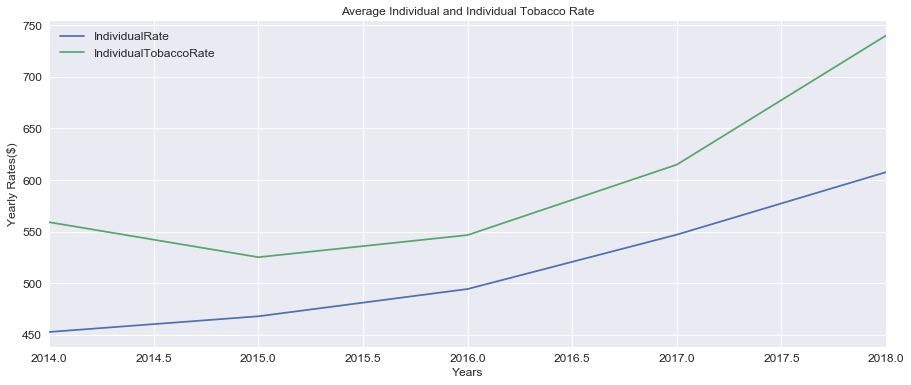

In [746]:
# Plot the above dataframe
averag_plan_rates_yearwise.plot(figsize=(15, 6), fontsize="large")
plt.title('Average Individual and Individual Tobacco Rate', fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.ylabel("Yearly Rates($)", fontsize="large")
plt.legend(fontsize="large")
plt.show()

We can see above that the individual rates has been increasing since its inception but. The increase in rate is also getting bigger every year. But the same is not true for the Individual Tobacco Rate. The second year of exchange saw a fall in individual tobacco rate but again started increasing every year and last year the incease in rate is very large.<br>

### Lets start with individual monthly rate prediction. ###
We will create two dataframes one for the target variables (**IndividualRate** and **IndividualTobaccoRate**) and other for dependent variables only. In this case depended variables are **Age, RatingAreaId, Tobacco and MetalLevel.** 

In [751]:
# first check for the nan values if any in the dataframe.
ml_plan_rates.isnull().any(axis=0)

Age                      False
BusinessYear             False
IndividualRate           False
IndividualTobaccoRate     True
PlanId                   False
RatingAreaId             False
StateCode                False
Tobacco                  False
MetalLevel               False
dtype: bool

In [752]:
# drop all the rows with nan values. There is only one column having nan values i.e 
# IndividualTobaccoRate
ml_plan_rates.dropna(inplace=True)

In [754]:
# just to make sure that there is no nan value.
ml_plan_rates.isnull().any(axis=0)

Age                      False
BusinessYear             False
IndividualRate           False
IndividualTobaccoRate    False
PlanId                   False
RatingAreaId             False
StateCode                False
Tobacco                  False
MetalLevel               False
dtype: bool

In [756]:
# Lets have a look of the dataframe we have ml_plan_rates
ml_plan_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6111323 entries, 14551 to 18072591
Data columns (total 9 columns):
Age                      object
BusinessYear             int64
IndividualRate           float64
IndividualTobaccoRate    float64
PlanId                   object
RatingAreaId             object
StateCode                object
Tobacco                  object
MetalLevel               object
dtypes: float64(2), int64(1), object(6)
memory usage: 466.3+ MB


As we can see that all the independent variable are of type object. We need to convert them into numeric columns.

**Lets start with Age and RatingAreaId columns.**<br>
Age and RatingAreaId column has the similar type of data formatting to be done. Remove all the characters and then convert them to numbers.

In [757]:
# replace 0-20 and 65 and over with 020 and 65 respectively.
ml_plan_rates['Age'] = ml_plan_rates['Age'].replace(['0-20','65 and over'], ['020','65'])

In [758]:
# check Age column values and make sure that they are only in numbers but within inverted comma.
ml_plan_rates.Age.unique()

array(['020', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65'], dtype=object)

In [759]:
# now check the unique values of RatingAreaId column
ml_plan_rates.RatingAreaId.unique()

array(['Rating Area 3', 'Rating Area 9', 'Rating Area 5', 'Rating Area 1',
       'Rating Area 2', 'Rating Area 4', 'Rating Area 6', 'Rating Area 7',
       'Rating Area 8', 'Rating Area 10', 'Rating Area 11',
       'Rating Area 12', 'Rating Area 13', 'Rating Area 32',
       'Rating Area 33', 'Rating Area 34', 'Rating Area 35',
       'Rating Area 36', 'Rating Area 37', 'Rating Area 38',
       'Rating Area 39', 'Rating Area 40', 'Rating Area 41',
       'Rating Area 42', 'Rating Area 43', 'Rating Area 44',
       'Rating Area 45', 'Rating Area 46', 'Rating Area 47',
       'Rating Area 48', 'Rating Area 49', 'Rating Area 50',
       'Rating Area 51', 'Rating Area 52', 'Rating Area 53',
       'Rating Area 54', 'Rating Area 55', 'Rating Area 56',
       'Rating Area 57', 'Rating Area 58', 'Rating Area 59',
       'Rating Area 60', 'Rating Area 61', 'Rating Area 62',
       'Rating Area 63', 'Rating Area 64', 'Rating Area 65',
       'Rating Area 66', 'Rating Area 67', 'Rating Area 14

In [760]:
# get sub string of the numerical values only.
ml_plan_rates.RatingAreaId = ml_plan_rates.RatingAreaId.str[12:]

In [761]:
# check that the substrings are correct.
ml_plan_rates.RatingAreaId.unique()

array(['3', '9', '5', '1', '2', '4', '6', '7', '8', '10', '11', '12', '13',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [763]:
# converting Age and RatingAreaId columns from object type to numeric type: ml_cols_tobe_num
ml_cols_tobe_num = ['Age','RatingAreaId']
ml_plan_rates[ml_cols_tobe_num] = ml_plan_rates[ml_cols_tobe_num].apply(pd.to_numeric)

Now let's change the **Tobacco** column to binary variable where 0 means "No Preference" and 1 means "Tobacco User/Non-Tobacco User".

In [764]:
# we know that the Tobacco column has only two kind of values: No Preference and
# Tobacco User/Non-Tobacco User. We will covert these into 0 and 1 value.
ml_plan_rates['Tobacco'] = ml_plan_rates['Tobacco'].replace({'No Preference':0,
                                                          'Tobacco User/Non-Tobacco User':1})

In [765]:
# Just to make sure that the Tobacco column has only the values we want.
ml_plan_rates['Tobacco'].unique()

array([1, 0])

In [766]:
# check datatype of the columns Age and RatingAreaId
ml_plan_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6111323 entries, 14551 to 18072591
Data columns (total 9 columns):
Age                      int64
BusinessYear             int64
IndividualRate           float64
IndividualTobaccoRate    float64
PlanId                   object
RatingAreaId             int64
StateCode                object
Tobacco                  int64
MetalLevel               object
dtypes: float64(2), int64(4), object(3)
memory usage: 466.3+ MB


In [769]:
# Lets save this intermediate dataset as csv file to the hard drive.
ml_plan_rates.to_csv('ml_plan_rates_Fully_formated.csv')

Let's deal with MetalLevel column. We need to change the data type of the values from object to numeric.<br>
Lets try **OneHotEncoder** for metal level to do that, we may want to seperate the data from year 2014 and 2015 as training data and then 2016 as the test data. Otherwise all the object data type in the dataframe will have the numerical values, like PlanId, StateCode. These two columns are not required at this moment and can be used if I want to have statewise data or year wise.<br>
<br>
Now let's divide the entire dataframe into training and test dataset. Dataset from year 2014 to 2017 as **Training** data and data from year 2018 as **Test** data.

In [772]:
# get the data from year 2014 to 2017: year_14to17
year_14to17 = ml_plan_rates[ml_plan_rates.BusinessYear < 2018]

In [774]:
# get only the column which will be used as features in the regression.
all_regression_columns = year_14to17[['Age','RatingAreaId','Tobacco',
                                       'MetalLevel','IndividualRate', 'IndividualTobaccoRate']]

In [776]:
# check if we have only the columns to be used in the regression.
all_regression_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654319 entries, 14551 to 15775490
Data columns (total 6 columns):
Age                      int64
RatingAreaId             int64
Tobacco                  int64
MetalLevel               object
IndividualRate           float64
IndividualTobaccoRate    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 302.0+ MB


MetalLevel column is the only column which object type value. We will use OneHotEncoder for this column to change it into numberical values which will be used in prediction calculation. This dataframe will be my **training data**.

In [780]:
# use OneHotEncoder on this dataset to make it numerical categorical dataset: train_df
train_df = pd.get_dummies(all_regression_columns)
train_df.columns

Index(['Age', 'RatingAreaId', 'Tobacco', 'IndividualRate',
       'IndividualTobaccoRate', 'MetalLevel_Bronze', 'MetalLevel_Catastrophic',
       'MetalLevel_Expanded Bronze', 'MetalLevel_Gold', 'MetalLevel_Platinum',
       'MetalLevel_Silver'],
      dtype='object')

In [781]:
# getting all the independent variables in one dataframe: train_features
train_features = train_df[['Age', 'RatingAreaId', 'Tobacco', 'MetalLevel_Bronze',
                           'MetalLevel_Catastrophic', 'MetalLevel_Expanded Bronze',
                           'MetalLevel_Gold', 'MetalLevel_Platinum', 'MetalLevel_Silver']]

**Target Variables** for training dataset.

In [790]:
# get all the target variables into one dataframe: train_target
train_target = train_df[['IndividualRate', 'IndividualTobaccoRate']]

In [791]:
# Make sure the dataframe has the same number of rows as in the train_df
train_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5654319 entries, 14551 to 15775490
Data columns (total 2 columns):
IndividualRate           float64
IndividualTobaccoRate    float64
dtypes: float64(2)
memory usage: 129.4 MB


Now let's get **Test Data** into another datframe. Test data will be data from year 2018.

In [784]:
# get the data from year 2014 to 2017: year_18
year_18 = ml_plan_rates[ml_plan_rates.BusinessYear == 2018]

In [785]:
# get only the column which will be used as features in the regression.
all_regression_columns_test = year_18[['Age','RatingAreaId','Tobacco',
                                       'MetalLevel','IndividualRate', 'IndividualTobaccoRate']]

In [786]:
# check if we have only the columns to be used in the regression.
all_regression_columns_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457004 entries, 15825139 to 18072591
Data columns (total 6 columns):
Age                      457004 non-null int64
RatingAreaId             457004 non-null int64
Tobacco                  457004 non-null int64
MetalLevel               457004 non-null object
IndividualRate           457004 non-null float64
IndividualTobaccoRate    457004 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.4+ MB


MetalLevel column is the only column which object type value. We will use OneHotEncoder for this column to change it into numberical values which will be used in prediction calculation. This dataframe will be my **test data**.

In [787]:
# use OneHotEncoder on this dataset to make it numerical categorical dataset: test_df
test_df = pd.get_dummies(all_regression_columns_test)
test_df.columns

Index(['Age', 'RatingAreaId', 'Tobacco', 'IndividualRate',
       'IndividualTobaccoRate', 'MetalLevel_Bronze', 'MetalLevel_Catastrophic',
       'MetalLevel_Expanded Bronze', 'MetalLevel_Gold', 'MetalLevel_Platinum',
       'MetalLevel_Silver'],
      dtype='object')

In [788]:
# getting all the independent variables in one dataframe: test_features
test_features = test_df[['Age', 'RatingAreaId', 'Tobacco', 'MetalLevel_Bronze',
                           'MetalLevel_Catastrophic', 'MetalLevel_Expanded Bronze',
                           'MetalLevel_Gold', 'MetalLevel_Platinum', 'MetalLevel_Silver']]

In [789]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457004 entries, 15825139 to 18072591
Data columns (total 9 columns):
Age                           457004 non-null int64
RatingAreaId                  457004 non-null int64
Tobacco                       457004 non-null int64
MetalLevel_Bronze             457004 non-null uint8
MetalLevel_Catastrophic       457004 non-null uint8
MetalLevel_Expanded Bronze    457004 non-null uint8
MetalLevel_Gold               457004 non-null uint8
MetalLevel_Platinum           457004 non-null uint8
MetalLevel_Silver             457004 non-null uint8
dtypes: int64(3), uint8(6)
memory usage: 16.6 MB


**Target Variables** for training dataset.

In [794]:
# get all the target variables into one dataframe: test_target
test_target = test_df[['IndividualRate', 'IndividualTobaccoRate']]

In [795]:
# make sure we have same number of rows as in the test_df
test_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457004 entries, 15825139 to 18072591
Data columns (total 2 columns):
IndividualRate           457004 non-null float64
IndividualTobaccoRate    457004 non-null float64
dtypes: float64(2)
memory usage: 10.5 MB


### Regression Anaylysis ###
**1. Ordinary Least Square(OLS)** method: For Individual Rate

In [797]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import OLS

In [798]:
# initiate and fit the ols model: m
m = sm.OLS(train_target[['IndividualRate']], train_features).fit()

# predict using model m
prediction = m.predict(test_features)

# print summary.
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         IndividualRate   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                 1.257e+06
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        02:29:24   Log-Likelihood:            -3.6078e+07
No. Observations:             5654319   AIC:                         7.216e+07
Df Residuals:                 5654310   BIC:                         7.216e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                 

The table in the middle is the one we need to concern about. All the p values are 0 except MetalLevel_Gold which is 0.009 which is smaller than 0.05.<br>
**R-Squared value: 0.640** which means there this model is **64%** accurate.

**2.Linear Regression in sklearn:** with the same training and test data for **Individual Rate**

In [799]:
# importing required 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# This creates a LinearRegression object: lm
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [800]:
# fit the linear model
lm.fit(train_features, train_target.IndividualRate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [801]:
# print the intercept coefficient.
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 297105581056.72845


In [802]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 9


In [803]:
y_predict = lm.predict(test_features)

In [808]:
# Calculate the score for goodness of fit of the model: lm_score
lm_score = lm.score(train_features, train_target.IndividualRate)

# print the score in percentage format. 
print('The score for this model is {0:.2f}%' .format(lm_score*100))

The score for this model is 64.00%


As we can see above both regression models OLS and Linear model perform the same with score of **64%.** which is not that great.

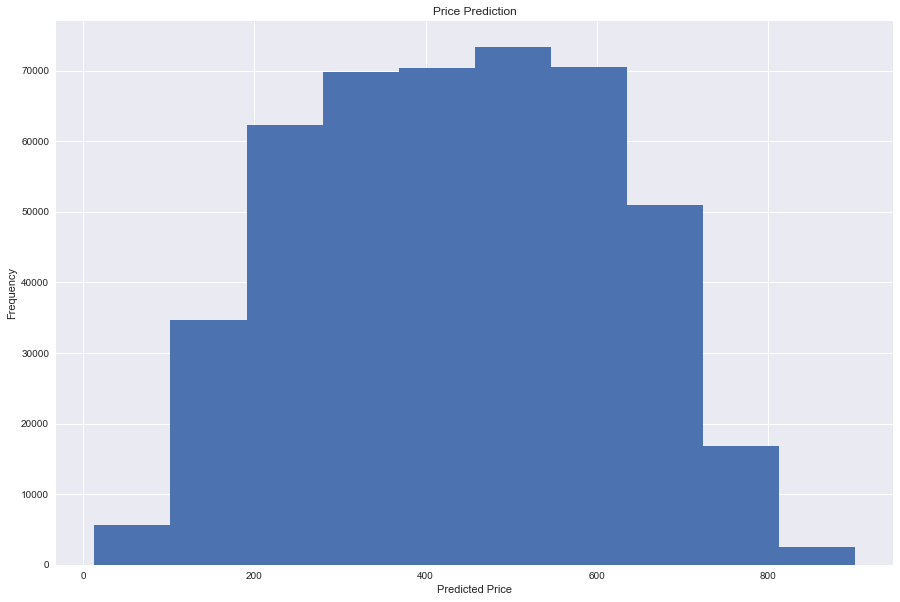

In [809]:
# plot the predicted price to check if the distributio is normal.
plt.figure(figsize=(15,10))
plt.hist(y_predict)
plt.title('Price Prediction')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.show()

The distribution is near to normal but slightly left skewed.

In [810]:
# The coefficients
pd.DataFrame({'features': train_features.columns, 'estimatedCoefficients': lm.coef_})[
    ['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Age,1.315240e+01
1,RatingAreaId,3.916033e-01
2,Tobacco,-2.572299e+01
3,MetalLevel_Bronze,-2.971056e+11
4,MetalLevel_Catastrophic,-2.971056e+11
5,MetalLevel_Expanded Bronze,-2.971056e+11
6,MetalLevel_Gold,-2.971056e+11
7,MetalLevel_Platinum,-2.971056e+11
8,MetalLevel_Silver,-2.971056e+11


### Model Evaluation ###
**Mean Squared Error:** This is for Linear Model __lm__

In [811]:
# Manual calculation on Mean Squared Error: mse
mse = np.mean((test_target.IndividualRate - lm.predict(test_features))**2)
print(mse)

77781.30797154522


In [812]:
# calculate mean_squared_error from sklearn package
mean_squared_error(test_target.IndividualRate, y_predict)

77781.307971542861

In [813]:
# calculate r-squared value from sklearn
r2_score(test_target.IndividualRate, y_predict)

0.20320464715011433

Low $R^2$ value is not bad, though we can conclude about how changes in the predictor values are associated with changes in the response value.

### Regression for predicting Individual Tobacco Rate ###
**1. OLS Method**: Individual Tobacco Rate

In [816]:
# fit the ols model: m_tobacco
#m = sm.OLS(Y_indi_train_df, X_indi_train_df).fit()
m_tobacco = sm.OLS(train_target[['IndividualTobaccoRate']], train_features).fit()

# predict using model m_tobacco: predict_tobacco
predict_tobacco = m_tobacco.predict(test_features)

# print summary.
print(m_tobacco.summary())

                              OLS Regression Results                             
Dep. Variable:     IndividualTobaccoRate   R-squared:                       0.622
Model:                               OLS   Adj. R-squared:                  0.622
Method:                    Least Squares   F-statistic:                 1.165e+06
Date:                   Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                           03:19:22   Log-Likelihood:            -3.7513e+07
No. Observations:                5654319   AIC:                         7.503e+07
Df Residuals:                    5654310   BIC:                         7.503e+07
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

Middle table has p-value as 0 for all the variables.<br>
The model performance is  **62.2%**

**2.Linear Regreesion:** Individual Tabacco Rates.

In [818]:
# create a LinearRegression object: lm_tobacco
lm_tobacco = LinearRegression()
lm_tobacco

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [819]:
# fit the linear model
lm_tobacco.fit(train_features, train_target.IndividualTobaccoRate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [821]:
# print the intercept coefficient.
print('Estimated intercept coefficient: {}'.format(lm_tobacco.intercept_))

Estimated intercept coefficient: 332655784018.43933


In [822]:
print('Number of coefficients: {}'.format(len(lm_tobacco.coef_)))

Number of coefficients: 9


In [824]:
# predict using test data from year 2016: y_predict_tobacco
y_predict_tobacco = lm_tobacco.predict(test_features)

In [826]:
# Calculate the score for goodness of fit of the model: lm_tobacco_score
lm_tobacco_score = lm_tobacco.score(train_features, train_target.IndividualTobaccoRate)

# print the score in percentage format. 
print('The score for this model is {0:.2f}%' .format(lm_tobacco_score*100))

The score for this model is 62.24%


As we can see above both regression models OLS and Linear model performed the same with score of **62.24%.** which is not that great.

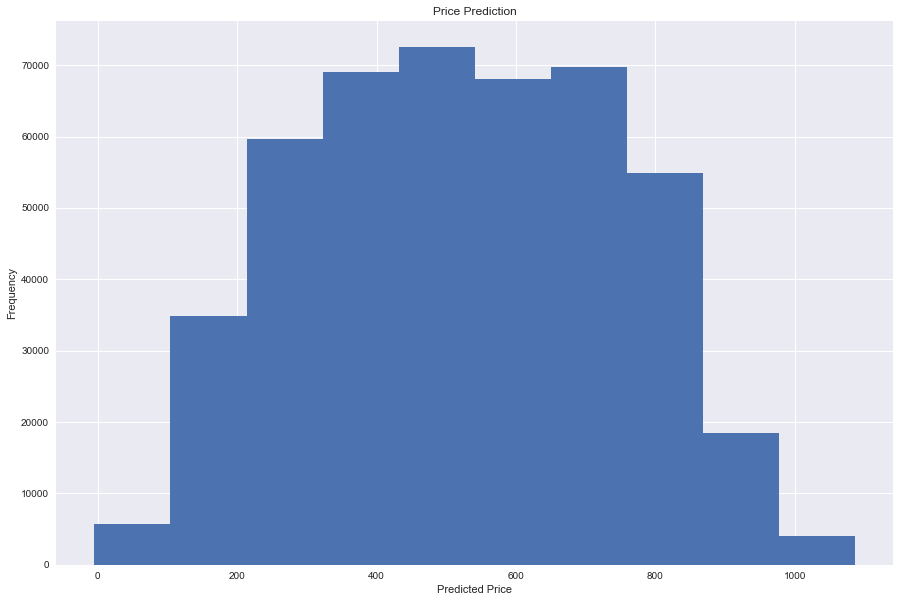

In [828]:
# plot the predicted values to see the distribution
plt.figure(figsize=(15,10))
plt.hist(y_predict_tobacco)
plt.title('Price Prediction')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.show()

The distribution looks normal.

In [829]:
# The coefficients
pd.DataFrame({'features': test_features.columns, 'estimatedCoefficients': lm_tobacco.coef_})[
    ['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,Age,1.644081e+01
1,RatingAreaId,3.327511e-01
2,Tobacco,6.156298e+01
3,MetalLevel_Bronze,-3.326558e+11
4,MetalLevel_Catastrophic,-3.326558e+11
5,MetalLevel_Expanded Bronze,-3.326558e+11
6,MetalLevel_Gold,-3.326558e+11
7,MetalLevel_Platinum,-3.326558e+11
8,MetalLevel_Silver,-3.326558e+11


### Model Evaluation ###
Individual Rates for tobacoo users.
#### Mean Squared Error ####

In [831]:
# manual calculation of Mean Squared Error: mse_tobacco
mse_tobacco = np.mean((test_target.IndividualTobaccoRate - lm_tobacco.predict(test_features))**2)
print(mse_tobacco)

105757.40761285773


In [832]:
# calculate mean_squared_error using sklearn package
mean_squared_error(test_target.IndividualTobaccoRate, y_predict_tobacco)

105757.40761285624

Calculation of Mean Squared error produced same result wether calculated manully or usking sklearn package.

In [833]:
# calculation of R-Squared value using sklearn package.
r2_score(test_target.IndividualTobaccoRate, y_predict_tobacco)

0.27865410310437988

Low $R^2$ value is not bad, though we can conclude about how changes in the predictor values are associated with changes in the response value.

## Decision Tree regression for individual and individual tobacco rates ##

We already have the required dataset in the format we need. I will be implementing the same datset as above to check the prediction score and will try to compare the models

In [834]:
# Let's have an another look at the dataset.
train_features.head()

,Age,RatingAreaId,Tobacco,MetalLevel_Bronze,MetalLevel_Catastrophic,MetalLevel_Expanded Bronze,MetalLevel_Gold,MetalLevel_Platinum,MetalLevel_Silver
14551,20,3,1,1,0,0,0,0,0
14552,21,3,1,1,0,0,0,0,0
14555,22,3,1,1,0,0,0,0,0
14556,23,3,1,1,0,0,0,0,0
14559,24,3,1,1,0,0,0,0,0


In [835]:
# storing the values of each data point into an array for training: X_train, Y_train
X_train = train_features.values
Y_train = train_target.IndividualRate.values

In [836]:
# Let's do the same thing for test dataset also: X_test, Y_test
X_test = test_features.values
Y_test = test_target.IndividualRate.values

**Decision Tree** Will use DecisionTreeRegressor to predict the IndividualRate and IndividualTobaccoRate and will compare with the Linear model to check if the model improves in predicting the monthly rates.

In [837]:
# import necesaary packages from sklearn for descision tree model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [838]:
# store all the features name in a list: features_name
features_name = ['Age', 'RatingAreaId', 'Tobacco', 'MetalLevel_Bronze', 'MetalLevel_Catastrophic',
       'MetalLevel_Expanded Bronze', 'MetalLevel_Gold', 'MetalLevel_Platinum',
       'MetalLevel_Silver']

In [839]:
# For predicting continueous target we need to use DecisionTreeRegressor()
# and not DecisionTreeClassifier()
# create regressor and fit the model with training data: dt
dt = tree.DecisionTreeRegressor()
dt = dt.fit(X_train, Y_train)

In [843]:
dt_importances = pd.DataFrame(dt.feature_importances_, features_name, columns=["Importances"])

print(dt_importances)
print('Score', dt.score(X_train, Y_train))

                            Importances
Age                            0.827148
RatingAreaId                   0.012227
Tobacco                        0.000346
MetalLevel_Bronze              0.066977
MetalLevel_Catastrophic        0.036383
MetalLevel_Expanded Bronze     0.000357
MetalLevel_Gold                0.005530
MetalLevel_Platinum            0.008546
MetalLevel_Silver              0.042487
Score 0.730541027738


This model is approximately **73%** accurate, which is better than Linear model but this score is on training data. We have to check the score on data which is not seen by the model i.e. test data.

In [844]:
print('Score on test data: ', dt.score(X_test, Y_test))

Score on test data:  0.256188218491


The score is very low **25.62%** and no big difference from the Linear model above.

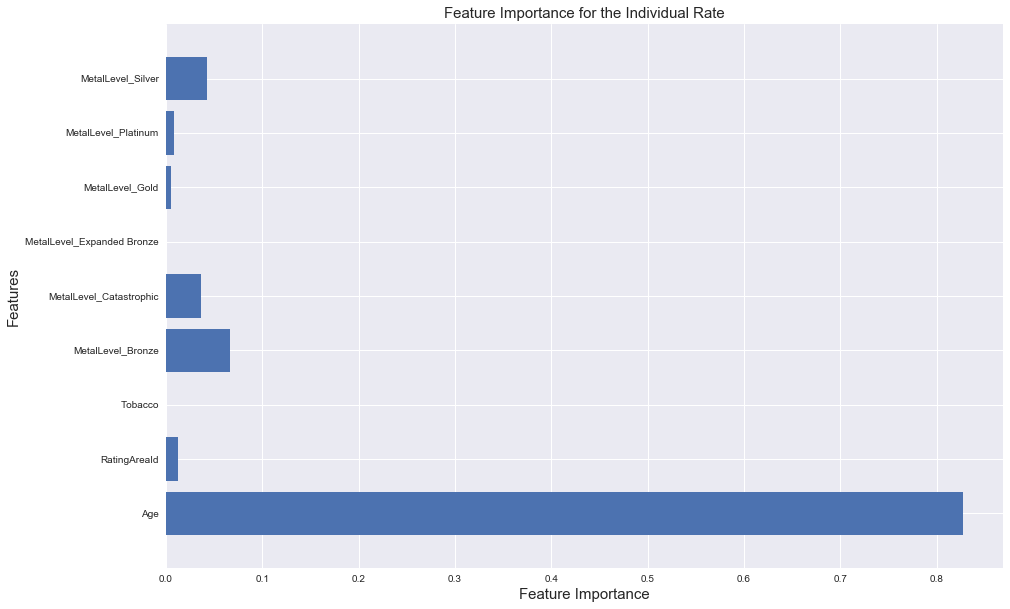

In [876]:
# plot the features importance.
n_features = dt_importances.shape[0]
plt.figure(figsize=(15,10))
plt.barh(range(n_features), dt.feature_importances_, align='center')
plt.title('Feature Importance for the Individual Rate', fontsize=15)
plt.yticks(np.arange(n_features), features_name)
plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.ylim(-1,n_features)
plt.show()

In [847]:
# predict using test dataset: dt_pred
dt_pred = dt.predict(X_test)

### Cross validation ###
Implement 5 fold cross validation on the training dataset to train the model in much better way for Individual Rate.

In [848]:
# import all the neccessary packages.
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn import cross_validation
#from sklearn.cross_validation import neg_mean_absolute_error 
#import visuals as vs

In [849]:
# get new regressor: cv_dt
cv_dt = tree.DecisionTreeRegressor()
cv_dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [850]:
# calculate score with 5 fold cross validation.
scores = cross_validation.cross_val_score(cv_dt, X_test, Y_test, cv=5)

In [851]:
print("Score on test data with 5 fold corss validation:", scores)
print("Average Score: ", scores.mean())

Score on test data with 5 fold corss validation: [ 0.70417789  0.74342826  0.72860679  0.74188463  0.73561604]
Average Score:  0.730742723257


The model improves significantly on the test data when we use 5 fold cross validation on the training data. 

In [852]:
# predict with cross validation model: cv_pred
cv_pred = cv_dt.predict(X_test)

### Random Forest Regressor ###
RandomForestRegressor with 5 fold cross validation score.

In [845]:
# initiate and fit the mode: forest
forest = RandomForestRegressor().fit(X_train, Y_train)

In [846]:
# calculate the cross val score on training and test dataset: score_forest_train, score_forest_test
score_forest_train = cross_validation.cross_val_score(forest, X_train, Y_train, cv=5)
print("The score of RandonForestTree on training dataset is {}".format(score_forest_train))
print("Average score: {}".format(score_forest_train.mean()))

# calculate the cross val score on test datset
score_forest_test = cross_validation.cross_val_score(forest, X_test, Y_test, cv=5)
print("The score of RandonForestTree on test dataset is {}".format(score_forest_test))
print("Average score: {}".format(score_forest_test.mean()))

The score of RandonForestTree on training dataset is [ 0.78416003  0.77578439  0.50416816  0.83413864  0.7950605 ]
Average score: 0.7386623425704906
The score of RandonForestTree on test dataset is [ 0.70352602  0.74181832  0.72732     0.74129895  0.73528468]
Average score: 0.7298495951010955


**Comaprision:** As we have seen the use of 5 fold cross validation definetly improve the predictive model from aproximately **25%** to **73%**. Although the Random Forest Regressor does not show any improvement and the score on test data remains almost same with cross validation score.

**Individual Tabacco Rates** <br>
First will create a simple **decision tree** and then with the **RandonForestRegressor**

In [858]:
# For individual tobacco rate the features will remain same. only the target variable will change.
# target variable: Y_train_tobacco
Y_train_tobacco = train_target.IndividualTobaccoRate.values

In [861]:
# similarly, what we have done above, test dataset for the tobacco individual rate: Y_test_tobacco
Y_test_tobacco = test_target.IndividualTobaccoRate.values

In [862]:
# initiate and fit the decision tree model with trainig data: dt_tobacco
dt_tobacco = tree.DecisionTreeRegressor().fit(X_train, Y_train_tobacco)

In [864]:
# predict using test dataset: tobacco_pred
tobacco_pred = dt_tobacco.predict(X_test)

In [866]:
tobacco_importances = pd.DataFrame(dt_tobacco.feature_importances_, 
                                   features_name, columns=["Importances"])

print(tobacco_importances)
print('Score', dt_tobacco.score(X_train, Y_train_tobacco))

                            Importances
Age                            0.835365
RatingAreaId                   0.013091
Tobacco                        0.000684
MetalLevel_Bronze              0.061705
MetalLevel_Catastrophic        0.035520
MetalLevel_Expanded Bronze     0.002381
MetalLevel_Gold                0.003277
MetalLevel_Platinum            0.008573
MetalLevel_Silver              0.039404
Score 0.708494348101


The score on the training data is approximately **71%**. We may want to check the score on test data as well.

In [868]:
print('Score on test data:', dt_tobacco.score(X_test, Y_test_tobacco))

Score on test data: 0.325730754011


As expected the score on test dataset is not very satisfactory and we train the data with 5 fold cross validation score. But before that let's plot the feature importance.

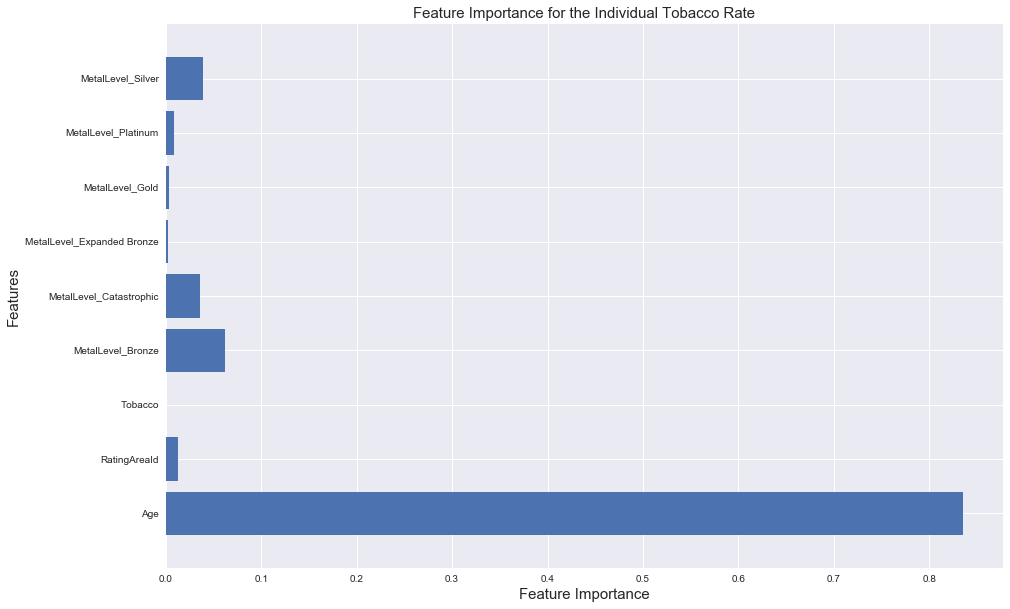

In [877]:
# plot the features importance for tobacco rate: tbco_n_features
tbco_n_features = tobacco_importances.shape[0]
plt.figure(figsize=(15,10))
plt.barh(range(tbco_n_features), dt_tobacco.feature_importances_, align='center')
plt.title('Feature Importance for the Individual Tobacco Rate', fontsize=15)
plt.yticks(np.arange(tbco_n_features), features_name)
plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.ylim(-1,tbco_n_features)
plt.show()

**Decision Tree with Cross Validation**: will use 5 fold for this model as well. 

In [878]:
# get new regressor: cv_tobacco
cv_tobacco = tree.DecisionTreeRegressor()
cv_tobacco.fit(X_train, Y_train_tobacco)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [879]:
# calculate score with training dataset: cv_scores_tobacco_train
cv_scores_tobacco_train = cross_validation.cross_val_score(cv_tobacco, X_train,
                                                           Y_train_tobacco, cv=5)

In [883]:
# print the scores and average score with training dataset.
print("Scores for 5 fold cross validation:", cv_scores_tobacco_train)
print("The Average Score:", cv_scores_tobacco_train.mean())

Scores for 5 fold cross validation: [ 0.67680533  0.74571927  0.51951372  0.81756964  0.78834432]
The Average Score: 0.709590454591


In [882]:
# calculate score with test dataset: cv_scores_tobacco_test
cv_scores_tobacco_test = cross_validation.cross_val_score(cv_tobacco, X_test,
                                                           Y_test_tobacco, cv=5)

In [884]:
# print the scores and average score with training dataset.
print("Scores for 5 fold cross validation:", cv_scores_tobacco_test)
print("The Average Score:", cv_scores_tobacco_test.mean())

Scores for 5 fold cross validation: [ 0.70279793  0.72901925  0.74179106  0.76607729  0.74718976]
The Average Score: 0.73737505663


Again we see a significant improvement from **32.5%** to **73.73%** when we use cross validation score.

In [885]:
# predict
cv_tobacco_pred = cv_tobacco.predict(X_test)

### Randon Forest Regressor ###
Individual Tobacco Rate: Will try to create a model with RandomForestRegressor and check if the model can predict better.

In [886]:
# initiate and fit the mode: tobacco_forest
tobacco_forest = RandomForestRegressor().fit(X_train, Y_train_tobacco)

In [887]:
# calculate the cross val score on training and test dataset: score_tobacco_train
score_tobacco_train = cross_validation.cross_val_score(tobacco_forest, 
                                                       X_train, Y_train_tobacco, cv=5)
print("The score of RandonForestTree on training dataset is {}".format(score_tobacco_train))
print("Average score: {}".format(score_tobacco_train.mean()))

The score of RandonForestTree on training dataset is [ 0.67613331  0.74567432  0.51950858  0.81747157  0.78831749]
Average score: 0.7094210518097191


In [888]:
# calculate the cross val score on test datset
score_tobacco_test = cross_validation.cross_val_score(tobacco_forest, 
                                                      X_test, Y_test_tobacco, cv=5)
print("The score of RandonForestTree on test dataset is {}".format(score_tobacco_test))
print("Average score: {}".format(score_tobacco_test.mean()))

The score of RandonForestTree on test dataset is [ 0.70241705  0.72763553  0.7406719   0.76543229  0.74691247]
Average score: 0.7366138456034197


Very little to no improvement with traing and test dataset. <br>Now let's implement **Grid searach** and **cross validation** to find the best parameters for the model.

**GridSearchCV** implementation

In [889]:
# function to compare the predicted price and true values: performace_metric

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [890]:
# Import 'make_scorer' and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit

# Function to perform GridSearchCV: fit_model
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

**Optimal Model**: Finding the max depth value for the decision tree model for individual rate.

In [891]:
# Fit the training data to the model using grid search:gs_reg
gs_reg = fit_model(X_train, Y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model ".format(
    gs_reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model 


**Make Prediction:** for individual rate using the above model.

In [892]:
# predict using the model: preds
preds = gs_reg.predict(X_test)

In [893]:
# check performance using the fuction we have created
print("Score after implementation of SearchGridCV: {}".format(
    performance_metric(Y_test, preds)))

Score after implementation of SearchGridCV: 0.25410225052828583


The low score is similar to low $R^2$ in Linear model. This is because the function created "performance_matrix" includes the sklearn r2_score function. 

**Optimal Model**: Finding the max depth value for the decision tree model for individual rate.

In [894]:
# Fit the training data to the model using grid search:gs_reg_tobacco
gs_reg_tobacco = fit_model(X_train, Y_train_tobacco)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model ".format(
    gs_reg_tobacco.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model 


**Make Prediction:** for individual tobacco rate using the above model.

In [895]:
# predict using the model: preds_tobacco
preds_tobacco = gs_reg_tobacco.predict(X_test)

In [896]:
# check performance using the fuction we have created
print("Score after implementation of SearchGridCV: {}".format(
    performance_metric(Y_test_tobacco, preds_tobacco)))

Score after implementation of SearchGridCV: 0.32297202188202645


As we found in the individual rate, similar result found in individual tobacco rate. The score above is the nothing but calculation of r2_score from sklearn package used for $R^2$ calculation. Hence we don't see better score than the Linear model.

### Conclusion ###
We tried to predict **Individual Rate** and **Individual Tobacco Rate** from the datasets we had. In the begining of this part I have used a plot to show how the average monthly rate kept increasing over the years since the inception of **Healthcare Insurance Marketplace.** When you compare the monthly individual rate of the years 2017 and 2018, you will find this huge increase in rates. This is not the similar increase what you will find if you compare year 2016 and 2017. The increase is big in this case too. But is not not as big as last year.<br>
The insurance company decides the rate based on the 5 criteria as explained above. My calculation and model is based on that criteria. I have used the small sample from the dataset where my training data was taken from year 2014 and 2015, test data from year 2016. That model gave me better result of around 84% accuracy when used in decision tree and cross validation, which I believed to be good as compared to the Linear model which was around 63-64%.<br>
Decision tree with cross validation of 5 fold gave us better performance on test data comapred to Linear mode. So I think **Decision Tree** with **cross validation** is better bet in prediction of continueous values. **GridSearchCV** helps find us the maximum depth of the decision tree at which the model will result in optimal performance.

-------------------------------------------------------------------------------------------------